<a href="https://colab.research.google.com/github/jiin124/Dacon/blob/main/%EB%94%B0%EB%A6%89%EC%9D%B4_%EB%8C%80%EC%97%AC%EB%9F%89_%EC%98%88%EC%B8%A1_%EA%B2%BD%EC%A7%84%EB%8C%80%ED%9A%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. bicycle_train.csv : 학습 데이터
- date_time : 일별 날짜
- wind_direction: 풍향 (degree)
- sky_condition : 하늘 상태 (하단 설명 참조)
- precipitation_form : 강수 형태 (하단 설명 참조)
- wind_speed : 풍속 (m/s)
- humidity : 습도 (%)
- low_temp : 최저 기온 ( `C)
- high_temp : 최고 기온 ( `C)
- Precipitation_Probability : 강수 확률 (%)
- number_of_rentals : 따릉이 대여량


2. bicycle_test.csv : 테스트 데이터
- date_time : 일별 날짜
- wind_direction: 풍향
- sky_condition : 하늘 상태
- precipitation_form : 강수 형태
- wind_speed : 풍속
- humidity : 습도
- low_temp : 최저 기온
- high_temp : 최고 기온
- Precipitation_Probability : 강수 확률


3. sample_submissoin.csv : 제출 양식
date_time : 일별 날짜
number_of_rentals : 따릉이 대여량






데이터 상세 설명
기상 데이터는 하루에 총 8번 3시간 간격으로 발표되는 기상단기예보(SHRT) 데이터를 1일 평균으로 변환한 데이터입니다.

2019년 6월 4일 까지 sky_condition (하늘 상태) 코드  : 맑음(1), 구름조금(2), 구름많음(3), 흐림(4)

2020년  sky_condition (하늘 상태) 코드  : 맑음(1), 구름많음(3), 흐림(4)

precipitation_form (강수 형태) 코드 : 없음(0), 비(1), 진눈깨비(2), 눈(3), 소나기(4)
원본 데이터에는 없음(0), 비(1),소나기(4)가 포함되어있었으며 진눈깨비(2)와 눈(3) 성분은 존재하지 않습니다.




In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [165]:
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
submission=pd.read_csv("sample_submission.csv")

In [84]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 21.5+ KB


In [85]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833


In [86]:
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459


In [87]:
train.isna().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
number_of_rentals            0
dtype: int64

In [88]:
test.isna().sum()

date_time                    0
wind_direction               0
sky_condition                0
precipitation_form           0
wind_speed                   0
humidity                     0
low_temp                     0
high_temp                    0
Precipitation_Probability    0
dtype: int64

In [166]:
def date(df):
  year=[]
  month=[]
  day=[]

  for date in df.date_time:
    year_p,month_p,day_p=date.split('-')
    year.append(int(year_p))
    month.append(int(month_p))
    day.append(int(day_p))
  return year,month,day

year,month,day=date(train)

train['year']=year
train['month']=month
train['day']=day

In [167]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5


In [91]:
train.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals', 'year', 'month',
       'day'],
      dtype='object')

In [168]:
year,month,day=date(test)

test['year']=year
test['month']=month
test['day']=day

In [93]:
train['year'].value_counts()

2020    91
2019    91
2018    91
Name: year, dtype: int64

2018,2019,2020년이 있었다.

In [94]:
train['month'].value_counts()

5    93
6    90
4    90
Name: month, dtype: int64

그리고 4,5,6월로 구성. 왜.. 봄 기간만 측정..?

In [95]:
data_description=train.describe()

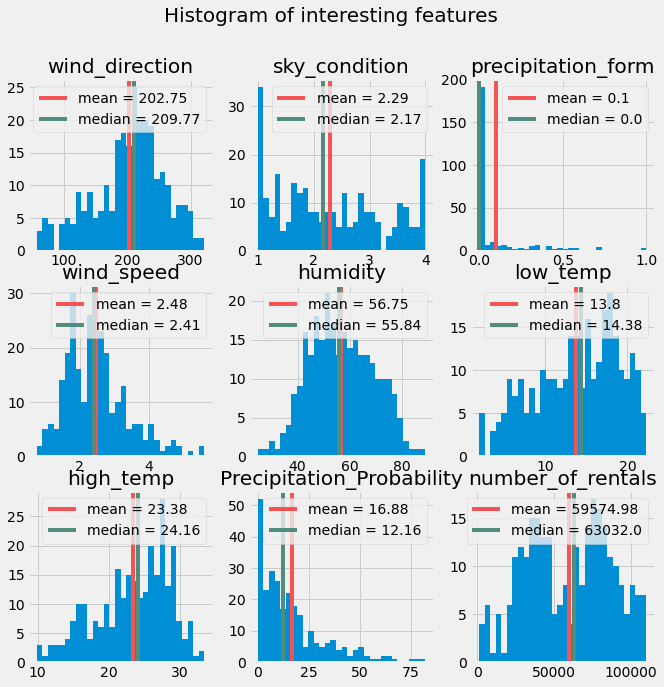

In [96]:
hist_col=['wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals']

fig, ax =plt.subplots(3, 3, figsize = (10,10))
fig.suptitle('Histogram of interesting features', fontsize=20)

idx=0
for i in range(3):
  for j in range(3):
    ax[i][j].hist(train[hist_col[idx]],bins=30)
    ax[i][j].set_title(hist_col[idx])
    ax[i][j].axvline(data_description[hist_col[idx]]['mean'], c='#f55354', label = f"mean = {round(data_description[hist_col[idx]]['mean'], 2)}")
    ax[i][j].axvline(data_description[hist_col[idx]]['50%'], c='#518d7d', label = f"median = {round(data_description[hist_col[idx]]['50%'], 2)}")
    ax[i][j].legend()
    idx+=1


In [169]:
week_day=pd.to_datetime(train['date_time']).dt.day_name()
train['week_day']=week_day
train.head()


,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,Sunday
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,Monday
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,Tuesday
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,Wednesday
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,Thursday


In [170]:
week_day=pd.to_datetime(test['date_time']).dt.day_name()
test['week_day']=week_day
test.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day
0,2021-04-01,108.833,3.000,0.000,2.900,28.333,11.800,20.667,18.333,2021,4,1,Thursday
1,2021-04-02,116.717,3.850,0.000,2.662,46.417,12.000,19.000,28.500,2021,4,2,Friday
2,2021-04-03,82.669,4.000,0.565,2.165,77.258,8.875,16.368,52.847,2021,4,3,Saturday
3,2021-04-04,44.123,3.466,0.466,3.747,63.288,6.250,17.368,37.671,2021,4,4,Sunday
4,2021-04-05,147.791,1.500,0.000,1.560,48.176,7.188,18.684,4.459,2021,4,5,Monday


In [171]:
from sklearn.preprocessing import LabelEncoder

# 요일 정보 추가
le = LabelEncoder()
le.fit(week_day)
train['week_day'] = le.transform(train['week_day'])
test['week_day'] = le.transform(test['week_day'])




In [172]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,3
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,1
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,5
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,6
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,4


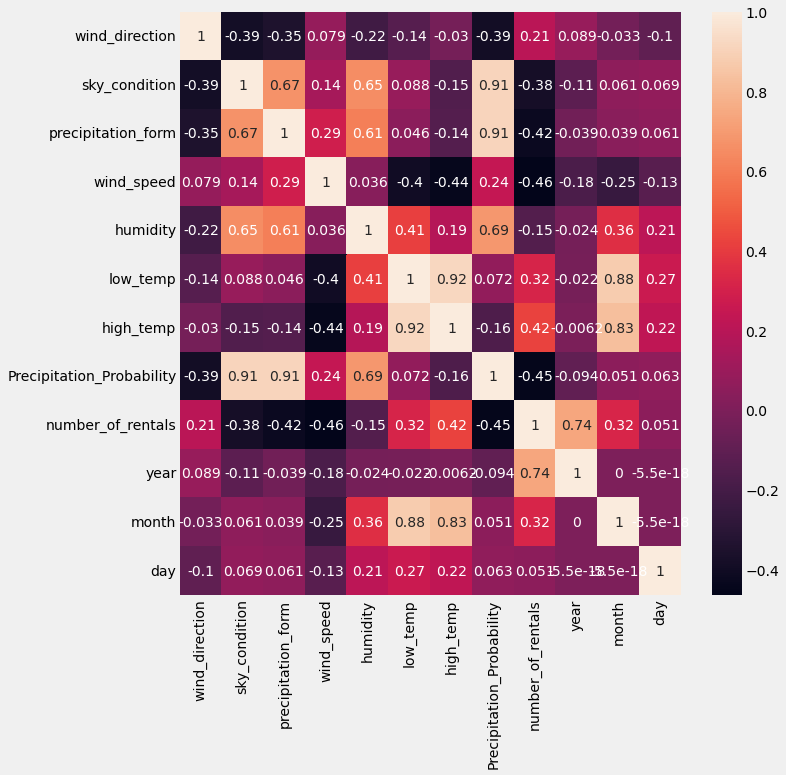

In [98]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(),annot=True)

렌탈수하고는 year이 가장 큰 상관관계를 보이고 최저온도와 달, 최고온도와 달의 관계도 높아보인다. 그리고 강수 스타일과 날씨상태도 연관성이 높다

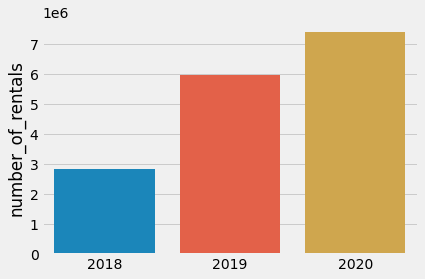

In [99]:
year_rental=train.groupby('year').sum()['number_of_rentals']
sns.barplot(x=['2018','2019','2020'],y=year_rental)

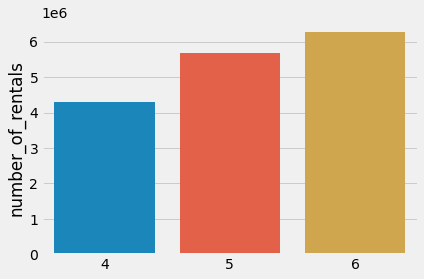

In [100]:
month_rental=train.groupby('month').sum()['number_of_rentals']
sns.barplot(x=['4','5','6'],y=month_rental)

가면갈수록 렌탈수가 증가하는 걸 볼 수 있음

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50900 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54868 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49688 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47785 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44552 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53664 missing from current font.
  font.set_

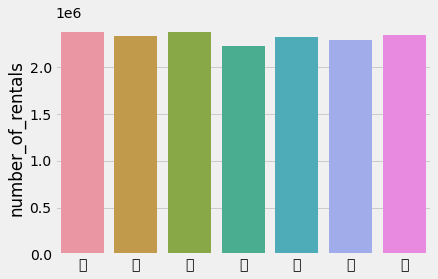

In [101]:
week_rental=train.groupby('week_day').sum()['number_of_rentals']
sns.barplot(x=['월','화','수','목','금','토','알'],y=week_rental)

In [102]:
train.columns

Index(['date_time', 'wind_direction', 'sky_condition', 'precipitation_form',
       'wind_speed', 'humidity', 'low_temp', 'high_temp',
       'Precipitation_Probability', 'number_of_rentals', 'year', 'month',
       'day', 'week_day'],
      dtype='object')

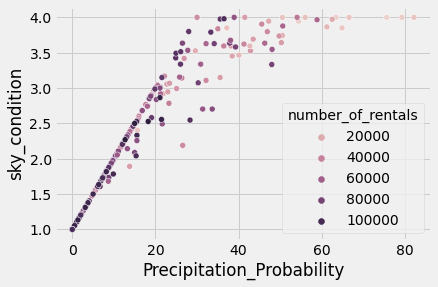

In [103]:
sns.scatterplot(data=train,x='Precipitation_Probability',y='sky_condition',hue='number_of_rentals')

날씨가 흐릴수록 렌탈수가 줄어드는 것을 볼 수 있다.

일교차 컬럼을 만들어보겠다. 

In [173]:
train['diurnal temperature']=train['high_temp']-train['low_temp']
test['diurnal temperature']=test['high_temp']-test['low_temp']
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,diurnal temperature
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,3,8.400
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,1,6.188
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,5,5.004
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,6,4.056
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,4,4.546


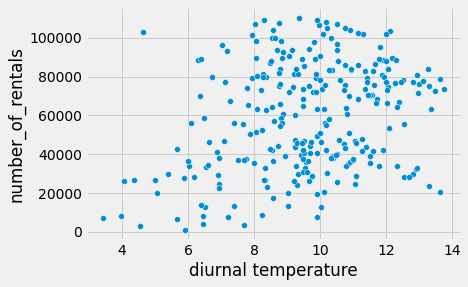

In [105]:
sns.scatterplot(data=train,x='diurnal temperature',y='number_of_rentals')

음 일교차는 별 상관 없어보이긴..한다..하지만 x축과y축의 범위가 달라서 그런 것일 수도 있음

In [174]:
# 2. "덥고 습한 날씨"를 알기 위한 정보
train['sweat_info'] = train['high_temp'] * train['humidity'] 

# 3. "춥고 바람부는 날씨"를 알기 위한 정보
train['cold_info'] = train['low_temp'] * train['wind_speed'] 

# 2. "덥고 습한 날씨"를 알기 위한 정보
test['sweat_info'] = test['high_temp'] * test['humidity'] 

# 3. "춥고 바람부는 날씨"를 알기 위한 정보
test['cold_info'] = test['low_temp'] * test['wind_speed'] 

In [139]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,diurnal temperature,sweat_info,cold_info
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,3,8.400,1575.000000,38.430000
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,1,6.188,1326.827000,41.997736
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,5,5.004,1146.846764,27.739280
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,6,4.056,888.628432,26.083056
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,4,4.546,768.903064,18.717750


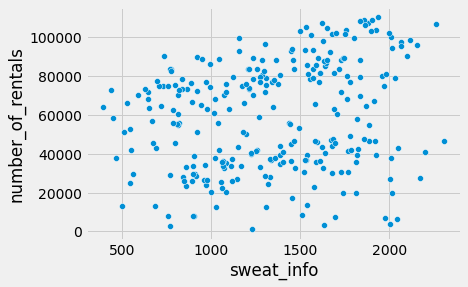

In [109]:
sns.scatterplot(data=train,x='sweat_info',y='number_of_rentals')



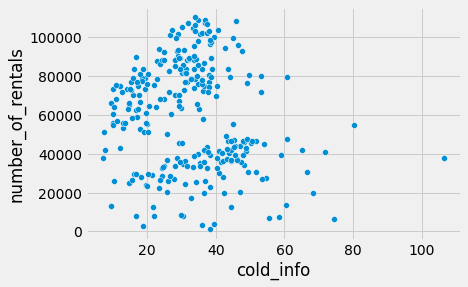

In [108]:
sns.scatterplot(data=train,x='cold_info',y='number_of_rentals')

In [116]:
def NMAE(true, pred):
    score = np.mean(np.abs(true-pred) / true)
    return score

In [118]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(X, y) # 학습

y_hat = model.predict(X) # y 예측

score = NMAE(y, y_hat)

print(f'모델 NMAE: {score}')

모델 NMAE: 0.28426261278331677


In [119]:
X_computer=X.copy()


In [120]:

col_list = X_computer.columns

# 이중 for문을 사용하여 feature 자기 자신의 제곱과 두 feature간의 곱이라는 새로운 feature를 추가합니다.
for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        X_computer[f'{col_list[i]}*{col_list[j]}'] = X_computer[col_list[i]] * X_computer[col_list[j]]

X_computer

,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,year,month,day,week_day,diurnal temperature,sweat_info,cold_info,wind_direction*wind_direction,wind_direction*sky_condition,wind_direction*precipitation_form,wind_direction*wind_speed,wind_direction*humidity,wind_direction*low_temp,wind_direction*high_temp,wind_direction*Precipitation_Probability,wind_direction*year,wind_direction*month,wind_direction*day,wind_direction*week_day,wind_direction*diurnal temperature,wind_direction*sweat_info,wind_direction*cold_info,sky_condition*sky_condition,sky_condition*precipitation_form,sky_condition*wind_speed,sky_condition*humidity,sky_condition*low_temp,sky_condition*high_temp,sky_condition*Precipitation_Probability,sky_condition*year,sky_condition*month,sky_condition*day,...,high_temp*week_day,high_temp*diurnal temperature,high_temp*sweat_info,high_temp*cold_info,Precipitation_Probability*Precipitation_Probability,Precipitation_Probability*year,Precipitation_Probability*month,Precipitation_Probability*day,Precipitation_Probability*week_day,Precipitation_Probability*diurnal temperature,Precipitation_Probability*sweat_info,Precipitation_Probability*cold_info,year*year,year*month,year*day,year*week_day,year*diurnal temperature,year*sweat_info,year*cold_info,month*month,month*day,month*week_day,month*diurnal temperature,month*sweat_info,month*cold_info,day*day,day*week_day,day*diurnal temperature,day*sweat_info,day*cold_info,week_day*week_day,week_day*diurnal temperature,week_day*sweat_info,week_day*cold_info,diurnal temperature*diurnal temperature,diurnal temperature*sweat_info,diurnal temperature*cold_info,sweat_info*sweat_info,sweat_info*cold_info,cold_info*cold_info
0,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,2018,4,1,3,8.400,1575.000000,38.430000,43056.250000,830.000000,0.000000,632.875000,15562.500000,2614.500000,4357.500000,6225.000000,418735.000,830.000,207.500,622.500,1743.000000,326812.500000,7974.225000,16.000000,0.000000,12.200000,300.000000,50.400000,84.000000,120.000000,8072.000,16.000,4.000,...,63.000,176.400000,33075.000000,807.030000,900.000000,60540.000,120.000,30.000,90.000,252.000000,47250.000000,1152.900000,4072324,8072,2018,6054,16951.200,3.178350e+06,77551.740000,16,4,12,33.600,6300.000000,153.720000,1,3,8.400,1575.000000,38.430000,9,25.200,4725.000000,115.290000,70.560000,13230.000000,322.812000,2.480625e+06,60527.250000,1476.864900
1,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,2018,4,2,1,6.188,1326.827000,41.997736,43395.972489,614.535150,0.000000,682.863126,14547.401061,2668.957404,3958.023000,4062.181500,420383.706,833.268,416.634,208.317,1289.065596,276400.620159,8748.842370,8.702500,0.000000,9.670100,206.007350,37.795400,56.050000,57.525000,5953.100,11.800,5.900,...,19.000,117.572000,25209.713000,797.956984,380.250000,39351.000,78.000,39.000,19.500,120.666000,25873.126500,818.955852,4072324,8072,4036,2018,12487.384,2.677537e+06,84751.431248,16,8,4,24.752,5307.308000,167.990944,4,2,12.376,2653.654000,83.995472,1,6.188,1326.827000,41.997736,38.291344,8210.405476,259.881990,1.760470e+06,55723.730064,1763.809829
2,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,2018,4,3,5,5.004,1146.846764,27.739280,45589.082256,621.545076,0.000000,574.358040,15987.864564,2201.776992,3270.211056,4080.931308,430875.288,854.064,640.548,1067.580,1068.434064,244870.133662,5922.780108,8.473921,0.000000,7.830590,217.972769,30.018232,44.584876,55.637943,5874.398,11.644,8.733,...,76.580,76.641264,17565.105037,424.854812,365.306769,38570.034,76.452,57.339,95.565,95.641452,21919.682200,530.180859,4072324,8072,6054,10090,10098.072,2.314337e+06,55977.867040,16,12,20,20.016,4587.387056,110.957120,9,15,15.012,3440.540292,83.217840,25,25.020,5734.233820,138.696400,25.040016,5738.821207,138.807357,1.315258e+06,31812.703504,769.467655
3,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,2018,4,4,6,4.056,888.628432,26.083056,20688.794896,531.042512,61.130300,

In [121]:
from sklearn.linear_model import LinearRegression

model = LinearRegression() # 모델 정의
model.fit(X_computer, y) # 학습

y_hat = model.predict(X_computer) # y 예측

score = NMAE(y, y_hat)

print(f'모델 NMAE: {score}')

모델 NMAE: 0.10278968206176078


In [122]:
test_X = test.drop('date_time', axis = 1)

In [123]:
col_list = test_X.columns

for i in range(len(col_list)):
    for j in range(i, len(col_list)):
        test_X[f'{col_list[i]}*{col_list[j]}'] = test_X[col_list[i]] * test_X[col_list[j]]

In [124]:
test_yhat = model.predict(test_X)

# submission dataFrame 완성
submission['number_of_rentals'] = test_yhat

# 제출 파일 생성
submission.to_csv('submission.csv', index= False)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- cold_info*week_day
- diurnal temperature*week_day
- sweat_info*week_day
Feature names seen at fit time, yet now missing:
- week_day*cold_info
- week_day*diurnal temperature
- week_day*sweat_info

  warnings.warn(message, FutureWarning)


In [175]:
y_test=pd.read_csv("test-y.csv")

In [176]:
test['number_of_rentals']=y_test['대여건수']

In [185]:
X_train=train.drop(['date_time','number_of_rentals'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time'],axis=1)
y_test=test['number_of_rentals'].astype('int64')


## 랜덤포레스트로

In [186]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_clf=RandomForestRegressor()

params = {'min_samples_split': [30, 50, 70],
        'max_depth': [3,5, 6, 7],
        'n_estimators': [50, 150, 250,400]}

grid_rf=GridSearchCV(rf_clf,param_grid=params,scoring='neg_mean_squared_error',cv=3)
grid_rf.fit(X_train,y_train)
print('RandomForest Regression best :',grid_rf.best_params_)



RandomForest Regression best : {'max_depth': 7, 'min_samples_split': 30, 'n_estimators': 50}


In [187]:
rf_clf=RandomForestRegressor(max_depth=7,min_samples_split=30,n_estimators=50)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
score=NMAE(y_test,pred)
print(f'모델 NMAE: {score}')

모델 NMAE: 0.44878007010817056


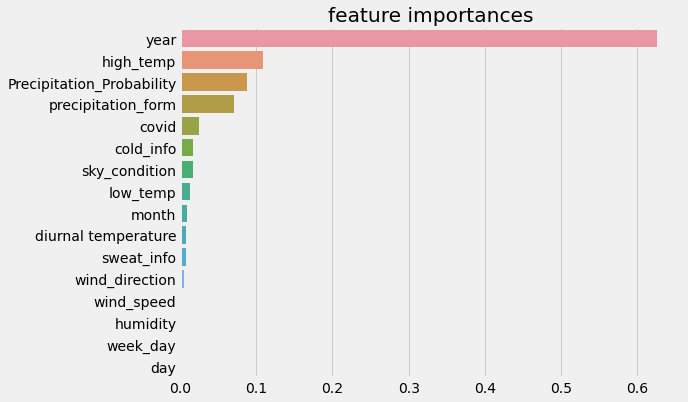

In [223]:

ftr_importances_values=rf_clf.feature_importances_
ftr_importances=pd.Series(ftr_importances_values,index=X_train.columns)
ftr_top20=ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title("feature importances")
sns.barplot(x=ftr_top20,y=ftr_top20.index)
plt.show()

뭐지 이 거지같은 오차율은??

컬럼을 더 만들어보겠다.

In [231]:
X_train=train.drop(['date_time','number_of_rentals'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time'],axis=1)
y_test=test['number_of_rentals'].astype('int64')


In [236]:
np.shape(X_train)

(273, 16)

In [237]:
np.shape(y_train)

(273,)

In [238]:
np.shape(X_test)

(91, 16)

In [239]:
np.shape(y_test)

(91,)

In [241]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf=XGBClassifier(n_estimators=50,learning_rate=0.1,max_depth=3)
xgb_clf.fit(X_train,y_train)
xgb_prd=xgb_clf.predict(X_test)

score=NMAE(y_test,pred)
print(f'모델 NMAE: {score}')

모델 NMAE: 0.49670253574389783


covid 삭제후 다시 모델

In [243]:
X_train=train.drop(['date_time','number_of_rentals','covid'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time','covid'],axis=1)
y_test=test['number_of_rentals'].astype('int64')

In [244]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_clf=XGBClassifier(n_estimators=50,learning_rate=0.1,max_depth=3)
xgb_clf.fit(X_train,y_train)
xgb_prd=xgb_clf.predict(X_test)

score=NMAE(y_test,pred)
print(f'모델 NMAE: {score}')

모델 NMAE: 0.49670253574389783


똑같다

## 코로나 변수 추가


In [195]:
train['covid']=0
test['covid']=0

In [200]:
# 코로나 여부 칼럼 생성 

train.loc[(train['year'] == 2020), "covid"] = 1
train.loc[train['year'] == 2019, "covid"] = 0
train.loc[train['year'] == 2018, "covid"] = 0
test.loc[(train['year'] == 2020), "covid"] = 1
test.loc[train['year'] == 2019, "covid"] = 0
test.loc[train['year'] == 2018, "covid"] = 0

In [201]:
train.head()

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,diurnal temperature,sweat_info,cold_info,covid
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,3,8.400,1575.000000,38.430000,0
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,1,6.188,1326.827000,41.997736,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,5,5.004,1146.846764,27.739280,0
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,6,4.056,888.628432,26.083056,0
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,4,4.546,768.903064,18.717750,0


## 풍향을 사용할 방법은 없는 걸까?

바람의 방향. 바람은 방향과 크기를 가지는 벡터량이므로 일반적으로 풍향과 풍속 두 성분으로 표시된다. 이론적으로 나타낼 때는 동서성분, 남북성분, 수직성분으로 나누어 표시한다. 보통 16방위를 사용하고 더욱 자세히 풍향을 표시하려면 북쪽부터 시계방향으로 360°의 각도로 나누어 표시한다. 옛날에는 동서를 기준으로 해서 동북풍 또는 서남풍이라고 했지만 현재는 세계적인 항해의 관계 때문에 남북이 기준으로 되고 있어서 옛날의 동북풍은 북동풍, 서남풍은 남서풍이라 하며 16방위도 이와 같이 표시되어 있다.

- 북동풍: 0도~90도 사이
- 남동풍 : 90도~180도 사이
- 남서풍 : 180도~270도 사이
- 북서풍 : 270도~360도 사이



In [211]:
train['wind_d']=0
test['wind_d']=0

In [212]:
train.loc[train['wind_direction']==0, "wind_d"] = '북'
train.loc[(train['wind_direction']>0) & (train['wind_direction']<90), "wind_d"] = '북동'
train.loc[train['wind_direction']==90, "wind_d"] = '동'
train.loc[(train['wind_direction']>90) & (train['wind_direction']<180), "wind_d"] = '남동'
train.loc[train['wind_direction']==180, "wind_d"] = '남'
train.loc[(train['wind_direction']>180) & (train['wind_direction']<270), "wind_d"] = '남서'
train.loc[train['wind_direction']==270, "wind_d"] = '서'
train.loc[(train['wind_direction']>270) & (train['wind_direction']<360), "wind_d"] = '북서'

test.loc[test['wind_direction']==0, "wind_d"] = '북'
test.loc[(test['wind_direction']>0) & (test['wind_direction']<90), "wind_d"] = '북동'
test.loc[test['wind_direction']==90, "wind_d"] = '동'
test.loc[(test['wind_direction']>90) & (test['wind_direction']<180), "wind_d"] = '남동'
test.loc[test['wind_direction']==180, "wind_d"] = '남'
test.loc[(test['wind_direction']>180) & (test['wind_direction']<270), "wind_d"] = '남서'
test.loc[test['wind_direction']==270, "wind_d"] = '서'
test.loc[(test['wind_direction']>270) & (test['wind_direction']<360), "wind_d"] = '북서'

In [213]:
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
train['wind_d']=le.fit_transform(train['wind_d'])
test['wind_d']=le.fit_transform(test['wind_d'])



In [215]:
X_train=train.drop(['date_time','number_of_rentals'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time'],axis=1)
y_test=test['number_of_rentals'].astype('int64')


In [216]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_clf=RandomForestRegressor()

params = {'min_samples_split': [30, 50, 70],
        'max_depth': [3,5, 6, 7],
        'n_estimators': [50, 150, 250,400]}

grid_rf=GridSearchCV(rf_clf,param_grid=params,scoring='neg_mean_squared_error',cv=3)
grid_rf.fit(X_train,y_train)
print('RandomForest Regression best :',grid_rf.best_params_)


RandomForest Regression best : {'max_depth': 6, 'min_samples_split': 30, 'n_estimators': 50}


In [217]:
rf_clf=RandomForestRegressor(max_depth=6,min_samples_split=30,n_estimators=50)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
score=NMAE(y_test,pred)
print(f'모델 NMAE: {score}')

모델 NMAE: 0.5028771869052814


풍향 레이블을 추가했을 시 결과가 너무 좋지 않게 나왔다. 더욱 악화되었음

In [219]:
X_train=train.drop(['date_time','number_of_rentals','wind_d'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time','wind_d'],axis=1)
y_test=test['number_of_rentals'].astype('int64')


In [220]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_clf=RandomForestRegressor()

params = {'min_samples_split': [30, 50, 70],
        'max_depth': [3,5, 6, 7],
        'n_estimators': [50, 150, 250,400]}

grid_rf=GridSearchCV(rf_clf,param_grid=params,scoring='neg_mean_squared_error',cv=3)
grid_rf.fit(X_train,y_train)
print('RandomForest Regression best :',grid_rf.best_params_)

RandomForest Regression best : {'max_depth': 5, 'min_samples_split': 30, 'n_estimators': 50}


In [221]:
rf_clf=RandomForestRegressor(max_depth=5,min_samples_split=30,n_estimators=50)
rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
score=NMAE(y_test,pred)
print(f'모델 NMAE: {score}')

모델 NMAE: 0.49670253574389783


In [225]:
train.drop('wind_d',axis=1,inplace=True)
test.drop('wind_d',axis=1,inplace=True)

In [233]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  273 non-null    object 
 1   wind_direction             273 non-null    float64
 2   sky_condition              273 non-null    float64
 3   precipitation_form         273 non-null    float64
 4   wind_speed                 273 non-null    float64
 5   humidity                   273 non-null    float64
 6   low_temp                   273 non-null    float64
 7   high_temp                  273 non-null    float64
 8   Precipitation_Probability  273 non-null    float64
 9   number_of_rentals          273 non-null    int64  
 10  year                       273 non-null    int64  
 11  month                      273 non-null    int64  
 12  day                        273 non-null    int64  
 13  week_day                   273 non-null    int64  

In [234]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   date_time                  91 non-null     object 
 1   wind_direction             91 non-null     float64
 2   sky_condition              91 non-null     float64
 3   precipitation_form         91 non-null     float64
 4   wind_speed                 91 non-null     float64
 5   humidity                   91 non-null     float64
 6   low_temp                   91 non-null     float64
 7   high_temp                  91 non-null     float64
 8   Precipitation_Probability  91 non-null     float64
 9   year                       91 non-null     int64  
 10  month                      91 non-null     int64  
 11  day                        91 non-null     int64  
 12  week_day                   91 non-null     int64  
 13  diurnal temperature        91 non-null     float64
 

In [242]:
train

,date_time,wind_direction,sky_condition,precipitation_form,wind_speed,humidity,low_temp,high_temp,Precipitation_Probability,number_of_rentals,year,month,day,week_day,diurnal temperature,sweat_info,cold_info,covid
0,2018-04-01,207.500,4.000,0.000,3.050,75.000,12.600,21.000,30.000,22994,2018,4,1,3,8.400,1575.000000,38.430000,0
1,2018-04-02,208.317,2.950,0.000,3.278,69.833,12.812,19.000,19.500,28139,2018,4,2,1,6.188,1326.827000,41.997736,0
2,2018-04-03,213.516,2.911,0.000,2.690,74.879,10.312,15.316,19.113,26817,2018,4,3,5,5.004,1146.846764,27.739280,0
3,2018-04-04,143.836,3.692,0.425,3.138,71.849,8.312,12.368,43.493,26034,2018,4,4,6,4.056,888.628432,26.083056,0
4,2018-04-05,95.905,4.000,0.723,3.186,73.784,5.875,10.421,63.378,2833,2018,4,5,4,4.546,768.903064,18.717750,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,2020-06-26,228.662,3.980,0.223,2.271,78.378,20.500,27.526,36.486,96150,2020,6,26,0,7.026,2157.432828,46.555500,1
269,2020-06-27,207.770,2.865,0.081,1.794,78.412,20.812,28.842,21.081,107001,2020,6,27,2,8.030,2261.558904,37.336728,1
270,2020-06-28,282.568,1.730,0.000,1.820,72.736,21.000,29.053,7.297,98568,2020,6,28,3,8.053,2113.199008,38.220000,1
271,2020-06-29,137.027,2.257,0.088,2.043,70.473,19.625,26.000,15.541,70053,2020,6,29,1,6.375,1832.298000,40.093875,1


In [253]:
X_train=train.drop(['date_time','number_of_rentals'],axis=1)
y_train=train['number_of_rentals']
X_test=test.drop(['number_of_rentals','date_time'],axis=1)
y_test=test['number_of_rentals'].astype('int64')
